In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
env = GridworldEnv('1') # Number of task 

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


# Q-Learning 

In [3]:
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

In [21]:
# Q learning params
ALPHA = 0.2 # learning rate
GAMMA = 0.99 # reward discount
TAU=0.5
LEARNING_COUNT = 300
TEST_COUNT = 100
BETA=1/TAU

TURN_LIMIT = 1000
record=True
from algorithms.Q_Learning import Q_Learning_Agents

env = GridworldEnv('1')
env.reset()
agents = Q_Learning_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    if j==3000:
        epsilon = agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon,True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/q_learning/{h}.gif".format(h=j), writer="pillow")
    else:
        epsilon = agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon)
        print("GAME "+str(j)+"\n")

    #print(reward_1)
    #print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


###### LEARNING #####
GAME 0

GAME 1

GAME 2

GAME 3

GAME 4

GAME 5

GAME 6

GAME 7

GAME 8

GAME 9

GAME 10

GAME 11

GAME 12

GAME 13

GAME 14

GAME 15

GAME 16

GAME 17

GAME 18

GAME 19

GAME 20

GAME 21

GAME 22

GAME 23

GAME 24

GAME 25

GAME 26

GAME 27

GAME 28

GAME 29

GAME 30

GAME 31

GAME 32

GAME 33

GAME 34

GAME 35

GAME 36

GAME 37

GAME 38

GAME 39

GAME 40

GAME 41

GAME 42

GAME 43

GAME 44

GAME 45

GAME 46

GAME 47

GAME 48

GAME 49

GAME 50

GAME 51

GAME 52

GAME 53

GAME 54

GAME 55

GAME 56

GAME 57

GAME 58

GAME 59

GAME 60

GAME 61

GAME 62

GAME 63

GAME 64

GAME 65

GAME 66

GAME 67

GAME 68

GAME 69

GAME 70

GAME 71

GAME 72

GAME 73

GAME 74

GAME 75

GAME 76

GAME 77

GAME 78

GAME 79

GAME 80

GAME 81

GAME 82

GAME 83

GAME 84

GAME 85

GAME 86

GAME 87

GAME 88

GAME 89

GAME 90

GAME 91

GAME 92

GAME 93

GAME 94

GAME 95

GAME 96

GAME 97

GAME 98

GAME 99

GAME 100

GAME 101

GAME 102

GAME 103

GAME 104

GAME 105

GAME 106

GAME 107

GAME 108

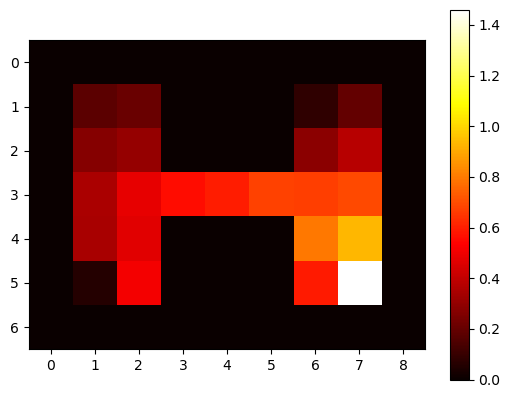

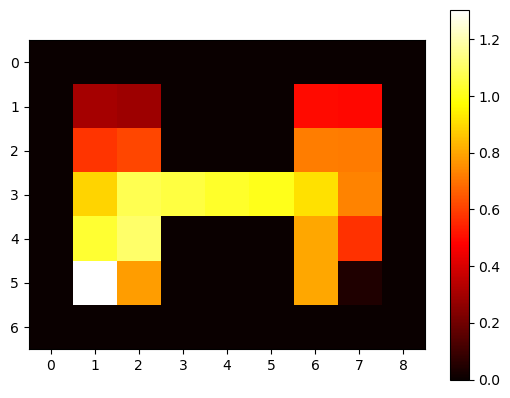

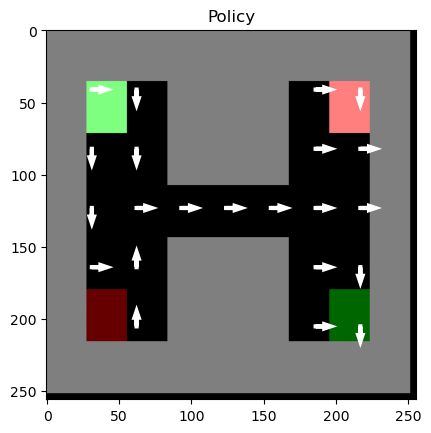

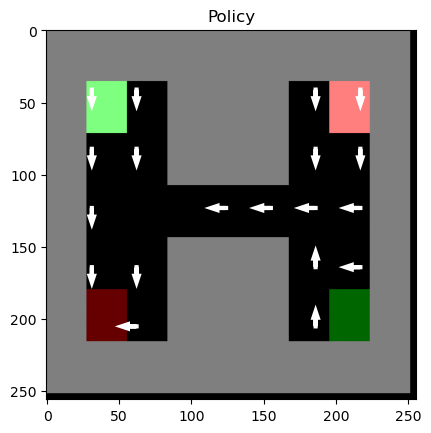

In [22]:
Q_a1 = agents.q_val_1
Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[5,7,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

#print([i for i in range(Q_a2_fixed_p1.ndim) if (i != 0 and i!=1)])
Q1=np.mean(agents.q_val_1,axis=tuple(i for i in range(agents.q_val_1.ndim) if (i != 0 and i!=1)))

#Q1=np.mean(Q1,axis=(2,3))
plt.figure()
plt.imshow(Q1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



Q=np.mean(agents.q_val_2,axis=tuple(i for i in range(agents.q_val_2.ndim) if (i != 2 and i!=3)))
#print(Q.shape)
#Q=np.mean(Q,axis=(2,3))
policy_function2 = np.argmax( Q_a2_mean , axis = 2)
plt.figure()
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

# Q-Learning with rollout

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

In [2]:
# Q learning params
ALPHA = 0.2 # learning rate
GAMMA = 0.99 # reward discount
LEARNING_COUNT = 300
TEST_COUNT = 100

TURN_LIMIT = 1000
from algorithms.Q_Learning_rollout import Q_Learning_Rollout_Agents


env = GridworldEnv('1')
env.reset()
agents = Q_Learning_Rollout_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA,10)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    if j==1050:
        epsilon=agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon,True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/q_learning_rollout/{h}.gif".format(h=j), writer="pillow")
    else:
        epsilon=agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon)
        print("GAME "+str(j)+"\n")

    print(reward_1)
    print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


###### LEARNING #####
GAME 0

76.49999999999994
-33.1000000000002
GAME 1

52.599999999999596
-98.29999999999869
GAME 2

-96.19999999999881
23.400000000000077
GAME 3

67.69999999999982
-41.100000000000314
GAME 4

81.4
-32.700000000000195
GAME 5

73.39999999999989
-60.900000000000595
GAME 6

-86.39999999999937
80.69999999999999
GAME 7

61.99999999999973
-47.1000000000004
GAME 8

-97.79999999999872
25.29999999999997
GAME 9

-99.7999999999986
92.10000000000001
GAME 10

-96.79999999999878
29.399999999999736
GAME 11

90.00000000000001
-23.90000000000007
GAME 12

-35.600000000000236
77.99999999999996
GAME 13

-27.100000000000115
84.70000000000005
GAME 14

91.40000000000002
-24.400000000000077
GAME 15

-35.00000000000023
84.80000000000004
GAME 16

-45.400000000000375
64.39999999999976
GAME 17

-53.200000000000486
93.2
GAME 18

-14.599999999999964
85.30000000000004
GAME 19

-43.70000000000035
81.5
GAME 20

-46.9000000000004
92.10000000000001
GAME 21

-30.100000000000158
91.30000000000001
GAME 2

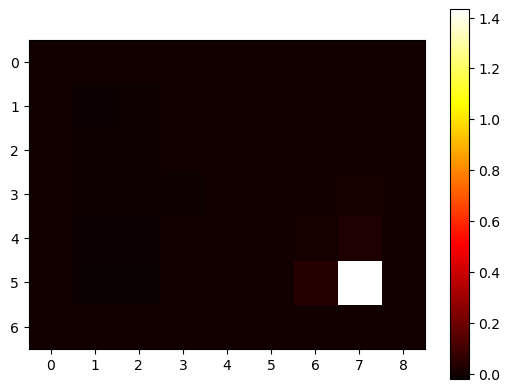

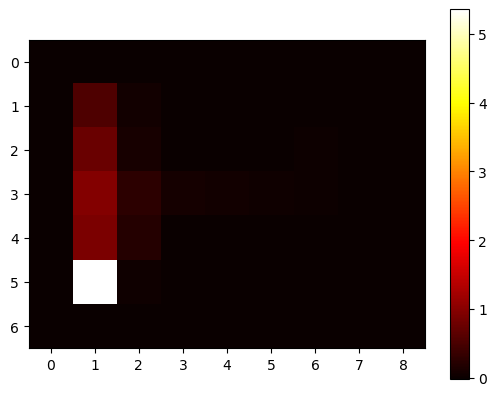

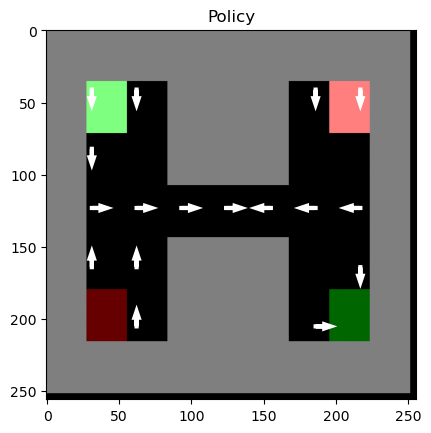

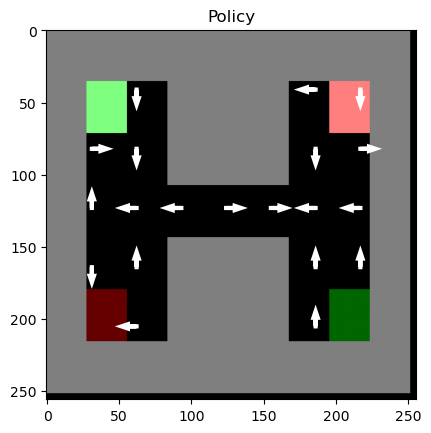

In [3]:
Q_a1 = agents.q_val_1
Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[5,7,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

#print([i for i in range(Q_a2_fixed_p1.ndim) if (i != 0 and i!=1)])
Q1=np.mean(agents.q_val_1,axis=tuple(i for i in range(agents.q_val_1.ndim) if (i != 0 and i!=1)))

#Q1=np.mean(Q1,axis=(2,3))
plt.figure()
plt.imshow(Q1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



Q=np.mean(agents.q_val_2,axis=tuple(i for i in range(agents.q_val_2.ndim) if (i != 2 and i!=3)))
#print(Q.shape)
#Q=np.mean(Q,axis=(2,3))
policy_function2 = np.argmax( Q_a2_mean , axis = 2)
plt.figure()
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

# Soft Q-Learning with rollout

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

In [12]:
# Q learning params
ALPHA = 0.1 # learning rate
GAMMA = 0.99 # reward discount
TAU=0.5
LEARNING_COUNT = 300
TEST_COUNT = 100

TURN_LIMIT = 100
from algorithms.Soft_Q_Learning_Baseline import Soft_Q_Learning_Baseline_Agents


env = GridworldEnv('1')
env.reset()
agents = Soft_Q_Learning_Baseline_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA,TAU)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    #TAU-=0.003
    if j==1050:
        total_reward,reward_1,reward_2=agents.learn(True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/q_learning_rollout/{h}.gif".format(h=j), writer="pillow")
    else:
        #epsilon=agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn()
        print("GAME "+str(j)+"\n")

    print(reward_1)
    print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


###### LEARNING #####
GAME 0

-9.799999999999981
-9.699999999999982
GAME 1

-9.599999999999982
-9.299999999999983
GAME 2

-9.89999999999998
-9.89999999999998
GAME 3

-9.499999999999982
-9.599999999999982
GAME 4

-9.99999999999998
-9.699999999999982
GAME 5

94.4
-9.699999999999982
GAME 6

-9.89999999999998
-9.599999999999982
GAME 7

-9.699999999999982
-9.299999999999983
GAME 8

-9.399999999999983
-9.799999999999981
GAME 9

-9.99999999999998
-9.699999999999982
GAME 10

-9.699999999999982
-9.699999999999982
GAME 11

-9.99999999999998
-9.599999999999982
GAME 12

-9.799999999999981
-9.699999999999982
GAME 13

-9.699999999999982
-9.299999999999983
GAME 14

-9.99999999999998
-9.89999999999998
GAME 15

-9.89999999999998
-9.499999999999982
GAME 16

-9.499999999999982
-9.299999999999983
GAME 17

-9.99999999999998
-9.799999999999981
GAME 18

-9.799999999999981
-9.299999999999983
GAME 19

-9.599999999999982
-9.99999999999998
GAME 20

-9.89999999999998
-9.699999999999982
GAME 21

-9.799999999999981

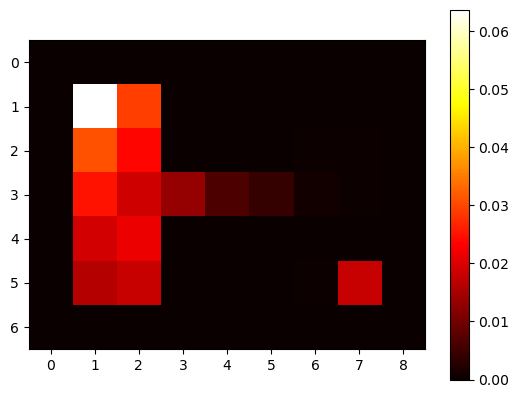

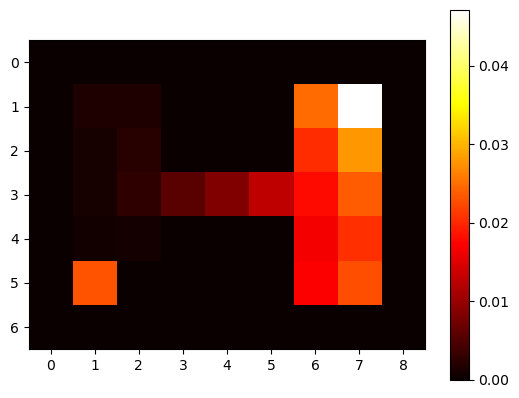

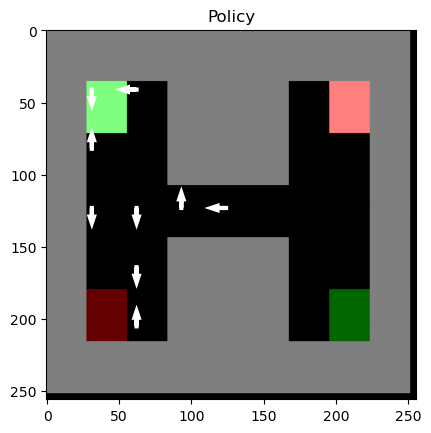

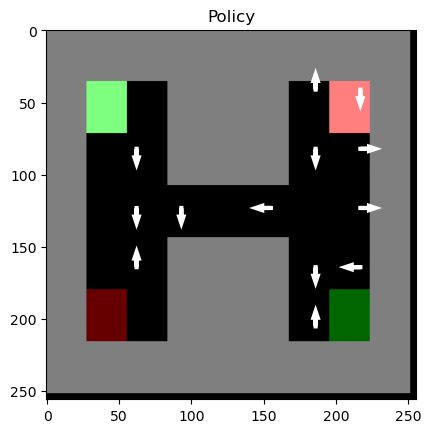

In [13]:
Q_a1 = agents.q_val_1

Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[5,7,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

#print([i for i in range(Q_a2_fixed_p1.ndim) if (i != 0 and i!=1)])
Q1=np.mean(agents.q_val_1,axis=tuple(i for i in range(agents.q_val_1.ndim) if (i != 0 and i!=1)))

#Q1=np.mean(Q1,axis=(2,3))
plt.figure()
plt.imshow(Q1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



Q=np.mean(agents.q_val_2,axis=tuple(i for i in range(agents.q_val_2.ndim) if (i != 2 and i!=3)))
#print(Q.shape)
#Q=np.mean(Q,axis=(2,3))
policy_function2 = np.argmax( Q_a2_mean , axis = 2)
plt.figure()
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

# Soft Q-Learning without rollout

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

In [2]:
# Q learning params
ALPHA = 0.1 # learning rate
GAMMA = 0.95 # reward discount
TAU=1
LEARNING_COUNT = 300
TEST_COUNT = 100

TURN_LIMIT = 500
from algorithms.Soft_Q_Learning_without_rollout import Soft_without_rollout


env = GridworldEnv('1')
env.reset()
agents = Soft_without_rollout(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA,TAU)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    #TAU-=0.003
    if j==1050:
        total_reward,reward_1,reward_2=agents.learn(True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/q_learning_rollout/{h}.gif".format(h=j), writer="pillow")
    else:
        #epsilon=agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn()
        print("GAME "+str(j)+"\n")

    print(reward_1)
    print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


###### LEARNING #####
GAME 0

-49.90000000000044
96.3
GAME 1

-50.00000000000044
93.9
GAME 2

-49.50000000000043
77.19999999999995
GAME 3

-48.00000000000041
54.89999999999963
GAME 4

80.6
-49.20000000000043
GAME 5

-49.90000000000044
92.10000000000001
GAME 6

-49.20000000000043
61.699999999999726
GAME 7

-50.00000000000044
94.9
GAME 8

-49.000000000000426
-48.00000000000041
GAME 9

-50.00000000000044
89.30000000000003
GAME 10

-48.70000000000042
71.69999999999987
GAME 11

-47.1000000000004
-48.900000000000425
GAME 12

-50.00000000000044
92.4
GAME 13

87.70000000000003
70.79999999999986
GAME 14

-49.000000000000426
74.3999999999999
GAME 15

-49.10000000000043
73.6999999999999
GAME 16

94.2
88.30000000000003
GAME 17

81.1
56.29999999999965
GAME 18

-49.600000000000435
91.9
GAME 19

51.799999999999585
-48.60000000000042
GAME 20

-50.00000000000044
92.70000000000002
GAME 21

92.4
80.29999999999998
GAME 22

80.19999999999999
-49.20000000000043
GAME 23

73.5999999999999
-48.70000000000042
G

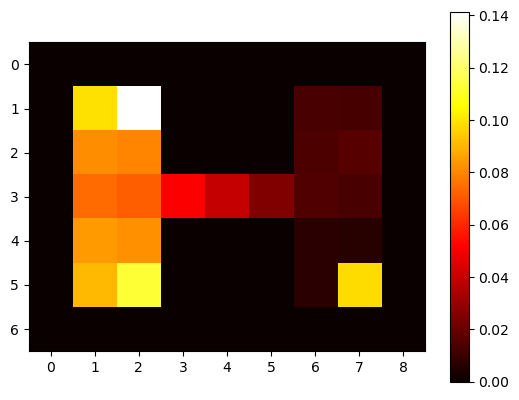

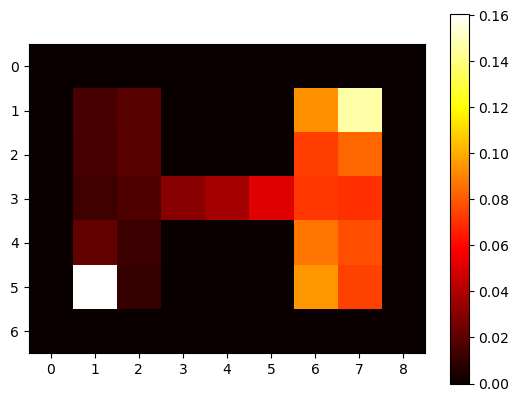

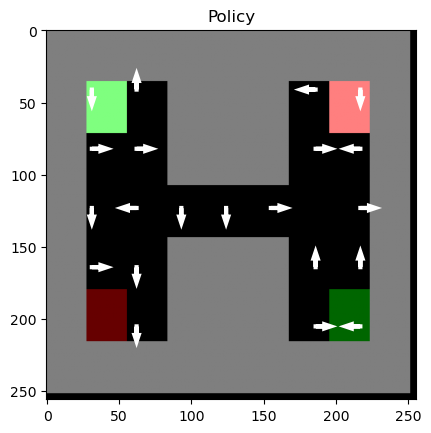

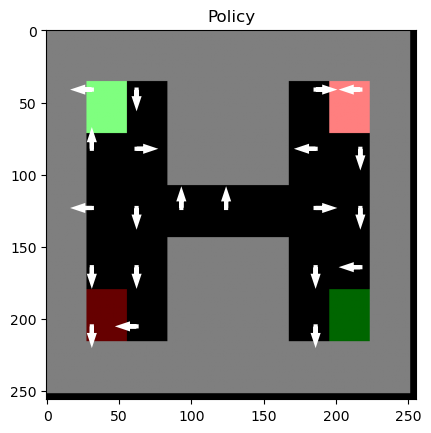

In [3]:
Q_a1 = agents.q_val_1

Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[5,7,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

#print([i for i in range(Q_a2_fixed_p1.ndim) if (i != 0 and i!=1)])
Q1=np.mean(agents.q_val_1,axis=tuple(i for i in range(agents.q_val_1.ndim) if (i != 0 and i!=1)))

#Q1=np.mean(Q1,axis=(2,3))
plt.figure()
plt.imshow(Q1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



Q=np.mean(agents.q_val_2,axis=tuple(i for i in range(agents.q_val_2.ndim) if (i != 2 and i!=3)))
#print(Q.shape)
#Q=np.mean(Q,axis=(2,3))
policy_function2 = np.argmax( Q_a2_mean , axis = 2)
plt.figure()
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)